## Notebook: Running UTOPIA Model Step by Step

### Import the necessary libraries and the UTOPIA class.

In [1]:
from utopia.utopia import utopiaModel

#### Step 1: Load Configuration and Data Files

In [2]:

# Load the default configuration and data from the 'data' folder.
data_data = utopiaModel.load_json_file("data/default_data.json")
config_data = utopiaModel.load_json_file("data/default_config.json")


In [3]:

# Display the loaded config and data to ensure they were loaded correctly.
print("Loaded Configuration Data:", config_data)
print("Loaded Input Data:", data_data)


Loaded Configuration Data: {'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'boxName': 'Utopia', 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'solver': 'SteadyState', 'compartment_types': {'UTOPIA_surfaceSea_water_compartments': ['Ocean_Surface_Water', 'Coast_Surface_Water'], 'UTOPIA_water_compartments': ['Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater'], 'UTOPIA_deep_soil_compartments': ['Beaches_Deep_Soil', 'Background_Soil', 'Impacted_Soil'], 'UTOPIA_soil_surface_compartments': ['Beaches_Soil_Surface', 'Background_Soil_Surface', 'Impacted_Soil_Surface'], 'UTOPIA_sediment_compartment': ['Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast'], 'UTOPIA_air_compartments': ['Air']}}
Loaded Input Data: {'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 's


#### Step 2: Initialize the UTOPIA Model with the Loaded Data

In [4]:

# We now initialize the model by passing the loaded data into the UTOPIA class.
model = utopiaModel(config=config_data, data=data_data)


In [5]:
model.summarize()

Model: UTOPIA
Microplastic Density (kg/m3): 980
MP shape:  sphere
Emissions made to MP form:  freeMP
Fragmentation style: Mixed (F = 0.5)
Fragmetation timescale (days):  36.5
Discorporation timescale (days):  4584
Emissions to Ocean_Surface_Water for size fraction 5000.0 µm: 100 g/s


#### Step 3: Running the Model


In [6]:
model.run()  # Run the model to estimate steady state solution for the system.

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


In [7]:
from utopia.results_processing.mass_balance_check import*
massBalance(model)

Difference inflow-outflow = 8.810729923425242e-13


'8.810729923425242e-13'


#### Step 4: Output and Results


In [8]:
from utopia.results_processing.process_results import*
# Process results
processor = ResultsProcessor(model)  # Pass model with results


#### Process rate constants

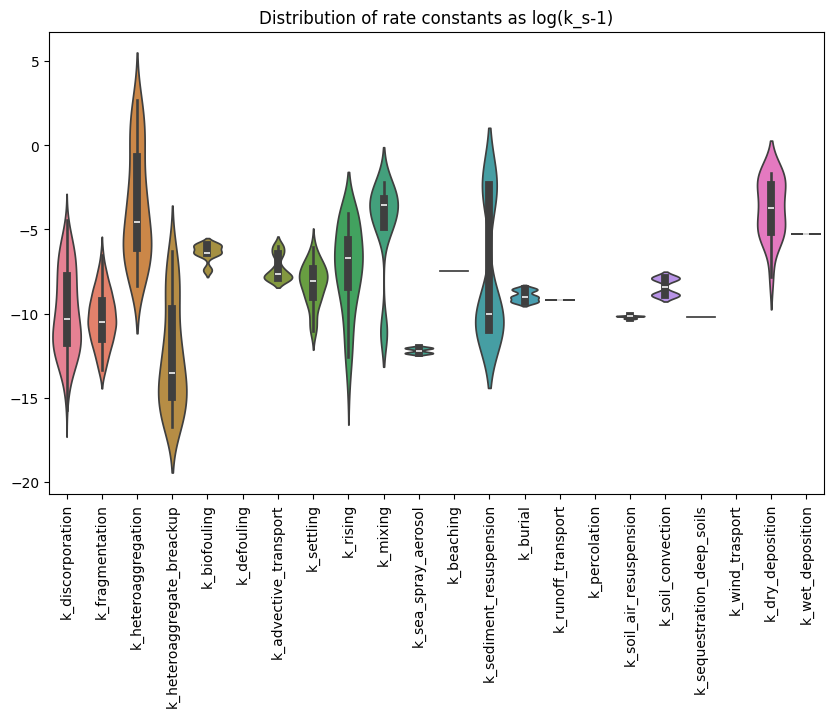

,Compartment,MP_form,Size_Bin,k_discorporation,k_fragmentation,k_heteroaggregation,k_heteroaggregate_breackup,k_biofouling,k_defouling,k_advective_transport,...,k_sediment_resuspension,k_burial,k_runoff_transport,k_percolation,k_soil_air_resuspension,k_soil_convection,k_sequestration_deep_soils,k_wind_trasport,k_dry_deposition,k_wet_deposition
0,Ocean_Surface_Water,freeMP,mp1,1.750117e-13,"[0.0, 0.0, 0.0, 0.0, 0.0]",4.437742e-09,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ocean_Surface_Water,freeMP,mp2,1.750117e-11,"[3.1709791983764586e-10, 0.0, 0.0, 0.0, 0.0]",1.163432e-08,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ocean_Surface_Water,freeMP,mp3,1.750117e-09,"[1.5854895991882295e-09, 1.5854895991882295e-0...",1.155613e-06,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ocean_Surface_Water,freeMP,mp4,1.750117e-07,"[1.9025875190258755e-08, 6.341958396752919e-09...",9.716749e-04,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ocean_Surface_Water,freeMP,mp5,1.750117e-05,"[2.2196854388635211e-07, 4.756468797564688e-08...",2.583064e+00,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Air,heterBiofMP,mp1,1.254827e-14,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[4.840643067841172e-06, 3.979424362519737e-07,...","[3.2552650689905588e-06, 2.6761074800290486e-0..."
336,Air,heterBiofMP,mp2,2.384638e-14,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[9.047223922011736e-06, 7.437595126070998e-07,...","[3.2552650689905588e-06, 2.6761074800290486e-0..."
337,Air,heterBiofMP,mp3,4.596027e-13,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[0.00014263743461190678, 1.1726022231899086e-0...","[3.2552650689905588e-06, 2.6761074800290486e-0..."
338,Air,heterBiofMP,mp4,3.602564e-11,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[0.002862705073244199, 0.00023533894467160903,...","[3.2552650689905588e-06, 2.6761074800290486e-0..."


<Figure size 640x480 with 0 Axes>

In [9]:
processor.create_rateConstants_table()
processor.plot_rateConstants()
processor.RC_df


#### General results: Heatmaps of mass and particle number distribution

c:\Users\PradoDomercq\AppData\Local\miniconda3\envs\utopia_env\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


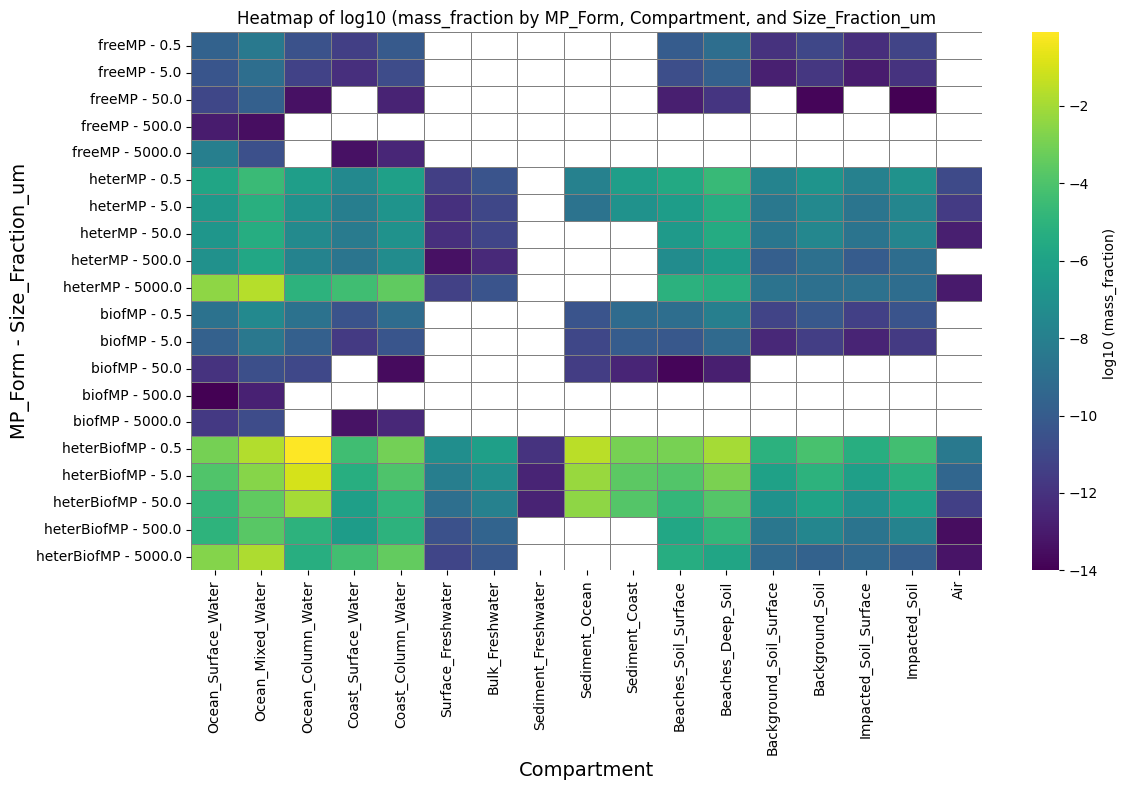

c:\Users\PradoDomercq\AppData\Local\miniconda3\envs\utopia_env\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


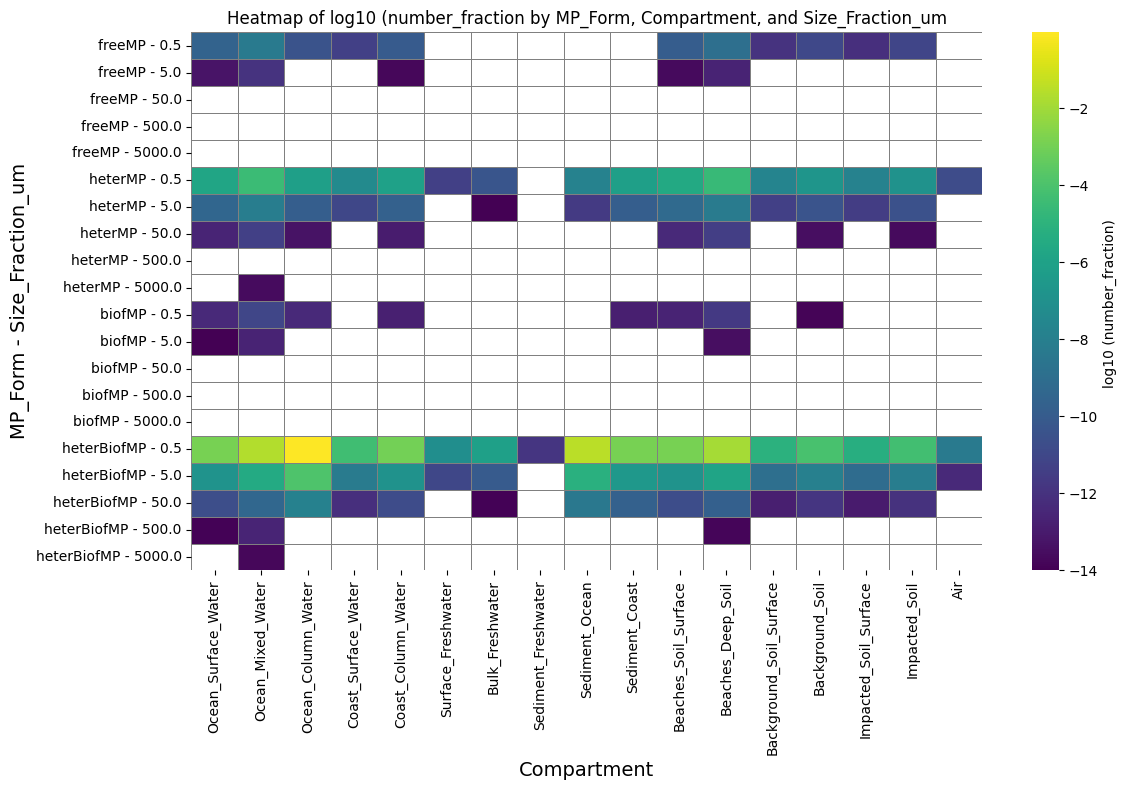

In [10]:
processor.estimate_flows()
processor.generate_flows_dict()
processor.process_results()
for fraction in ["mass_fraction", "number_fraction"]:
    processor.plot_fractionDistribution_heatmaps(fraction)


In [11]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
df=processor.Results_extended
# Sample DataFrame structure assumption:
# df = pd.DataFrame({
#     'MP_Form': ['freeMP', 'biofMP', ...],
#     'Size_Fraction_um': [0.5, 5.0, ...],
#     'Compartment': ['Ocean_Surface_Water', ...],
#     'number_fraction': [1e-3, 5e-7, ...]
# })

# Apply log10 scaling for better contrast (optional)
df['log_mass_fraction'] = np.log10(df['mass_fraction'])

# Remove extremely low values (e.g., < 1e-12) to avoid visual noise
df = df[df['log_mass_fraction'] > -12]

# Step 1: Create node labels and assign each a unique index
labels = (
    list(df['MP_Form'].unique()) +
    list(df['Size_Fraction_um'].astype(str) + " µm") +
    list(df['Compartment'].unique())
)

label_to_index = {label: i for i, label in enumerate(labels)}

# Step 2: Create Sankey links (source → target → value)
sources = []
targets = []
values = []

# MP_Form → Size_Fraction_um
for _, row in df.iterrows():
    mp_form = row['MP_Form']
    size_label = str(row['Size_Fraction_um']) + " µm"
    sources.append(label_to_index[mp_form])
    targets.append(label_to_index[size_label])
    values.append(row['mass_fraction'])

# Size_Fraction_um → Compartment
for _, row in df.iterrows():
    size_label = str(row['Size_Fraction_um']) + " µm"
    compartment = row['Compartment']
    sources.append(label_to_index[size_label])
    targets.append(label_to_index[compartment])
    values.append(row['mass_fraction'])

# Step 3: Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="rgba(0,100,150,0.7)"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(0,100,200,0.4)"
    )
)])

fig.update_layout(title_text="Alluvial Diagram of Microplastic Mass Fraction Distribution", font_size=12)
fig.show()


c:\Users\PradoDomercq\AppData\Local\miniconda3\envs\utopia_env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
df['Compartment'].unique()

array(['Ocean_Surface_Water', 'Ocean_Mixed_Water', 'Ocean_Column_Water',
       'Coast_Surface_Water', 'Coast_Column_Water', 'Surface_Freshwater',
       'Bulk_Freshwater', 'Sediment_Freshwater', 'Sediment_Ocean',
       'Sediment_Coast', 'Beaches_Soil_Surface', 'Beaches_Deep_Soil',
       'Background_Soil_Surface', 'Background_Soil',
       'Impacted_Soil_Surface', 'Impacted_Soil', 'Air'], dtype=object)

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd
import numpy as np

# Assume your DataFrame is preprocessed and contains:
# MP_Form | Size_Label | Compartment | mass_fraction

# Optional: Normalize values per compartment to show relative fractions
df['Size_Label'] = df['Size_Fraction_um'].astype(str)  # if not already done
compartments = df['Compartment'].unique()
n_cols = 5  # Adjust layout: 3 columns per row
n_rows = int(np.ceil(len(compartments) / n_cols))

# Create subplot grid
fig = make_subplots(
    rows=n_rows, cols=n_cols,
    specs=[[{'type': 'domain'}]*n_cols]*n_rows,
    subplot_titles=compartments
)

# Add one sunburst per compartment
for i, compartment in enumerate(compartments):
    row = i // n_cols + 1
    col = i % n_cols + 1
    df_sub = df[df['Compartment'] == compartment]

    fig.add_trace(
        go.Sunburst(
            labels=df_sub['MP_Form'] + " / " + df_sub['Size_Label'],
            parents=[""] * len(df_sub),
            values=df_sub['mass_fraction'],
            branchvalues='total',
            textinfo='label+percent entry',
            hovertemplate='<b>%{label}</b><br>%{value:.2e}<br>%{percentEntry:.2%}<extra></extra>',
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=300 * n_rows,  # adjust height based on number of rows
    width=1200,
    title_text="Microplastic Mass Fraction Distribution by Compartment",
    title_x=0.5,
    margin=dict(t=80, l=10, r=10, b=10),
    uniformtext=dict(minsize=10, mode='hide'),
)

fig.show()


C:\Users\PradoDomercq\AppData\Local\Temp\ipykernel_29036\1335435295.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
fig = px.bar(
    df,
    x='Compartment',
    y='mass_fraction',
    color='MP_Form',
    facet_col='Size_Fraction_um',
    #log_y=True,  # if needed
    title='Distribution of Microplastic Mass Fractions by Compartment and Size'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


NameError: name 'px' is not defined

In [14]:
fig = px.bar(
    df,
    x='Compartment',
    y='number_fraction',
    color='MP_Form',
    facet_col='Size_Fraction_um',
    #log_y=True,  # if needed
    title='Distribution of Microplastic Number Fractions by Compartment and Size'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

NameError: name 'px' is not defined

In [18]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Define grouping of compartments
compartment_group_map = {
    "Air": "Air",
    "Ocean_Surface_Water": "Ocean_Water",
    "Ocean_Mixed_Water": "Ocean_Water",
    "Ocean_Column_Water": "Ocean_Water",
    "Coast_Surface_Water": "Ocean_Water",
    "Coast_Column_Water": "Ocean_Water",
    "Surface_Freshwater": "Fresh_Water",
    "Bulk_Freshwater": "Fresh_Water",
    "Background_Soil_Surface": "Soil",
    "Background_Soil": "Soil",
    "Impacted_Soil_Surface": "Soil",
    "Impacted_Soil": "Soil",
    "Sediment_Coast": "Sediment",
    "Sediment_Freshwater": "Sediment",
    "Sediment_Ocean": "Sediment",
    "Beaches_Soil_Surface": "Beach",
    "Beaches_Soil": "Beach",
    # Add more mappings as needed
}

# Copy and prepare data
table_x = processor.Results_extended.copy()
table_x["Compartment"] = table_x["Compartment"].map(compartment_group_map)

# Create unique list of all nodes
labels = pd.unique(table_x[['Compartment', 'Size_Fraction_um', 'MP_Form']].values.ravel())
label_to_index = {label: i for i, label in enumerate(labels)}

# Assign colors to compartments
unique_compartments = table_x['Compartment'].unique()
color_palette = plt.cm.tab20.colors  # 20 distinct colors
compartment_colors = {
    comp: f"rgb({int(r*255)}, {int(g*255)}, {int(b*255)})"
    for comp, (r, g, b, *_) in zip(unique_compartments, color_palette)
}

# Group flows: Compartment → Size_Fraction
comp_size = table_x.groupby(["Compartment", "Size_Fraction_um"])["number_fraction"].sum().reset_index()

# Group flows: Compartment + Size_Fraction → MP_Form
# Join Compartment info into size_agg to retain origin color
joined = table_x.groupby(["Compartment", "Size_Fraction_um", "MP_Form"])["number_fraction"].sum().reset_index()

# Init Sankey components
source = []
target = []
value = []
link_colors = []
node_color_map = {}

# Compartment → Size_Fraction
for _, row in comp_size.iterrows():
    src = row['Compartment']
    tgt = row['Size_Fraction_um']
    mass = row['number_fraction']
    color = compartment_colors[src]

    source.append(label_to_index[src])
    target.append(label_to_index[tgt])
    value.append(mass)
    link_colors.append(color)

    # Track node colors
    node_color_map[src] = color
    node_color_map[tgt] = color  # assign based on last compartment (could be overwritten)

# Size_Fraction → MP_Form (with compartment info for coloring)
for _, row in joined.iterrows():
    comp = row['Compartment']
    src = row['Size_Fraction_um']
    tgt = row['MP_Form']
    mass = row['number_fraction']
    color = compartment_colors[comp]

    source.append(label_to_index[src])
    target.append(label_to_index[tgt])
    value.append(mass)
    link_colors.append(color)

    # Track color
    node_color_map[tgt] = color

# Assign final node colors
node_colors = [node_color_map.get(label, "lightgray") for label in labels]

# Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=labels.tolist(),
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
)])

fig.update_layout(title_text="Particle Number Distribution Alluvial Diagram with Full Path Coloring", font_size=12)
fig.show()

#### Results by compartment

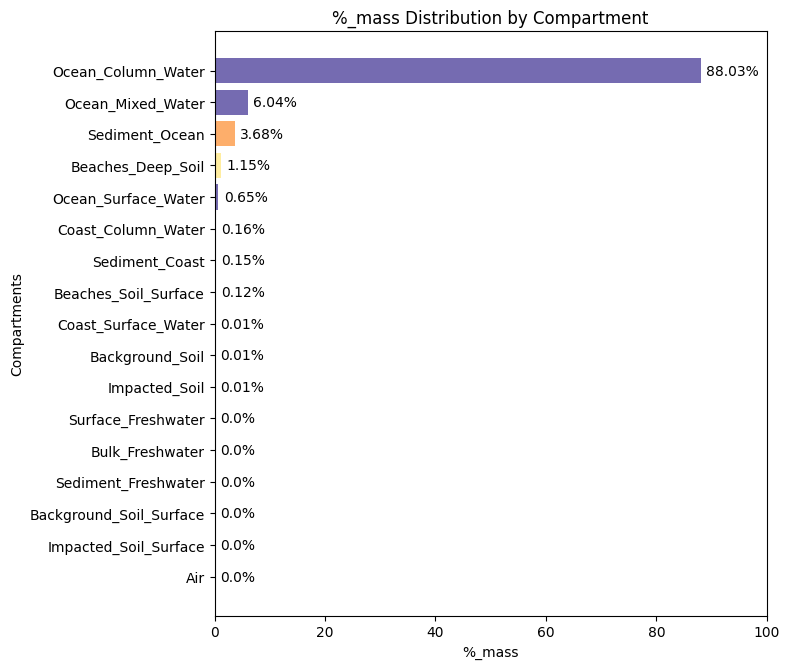

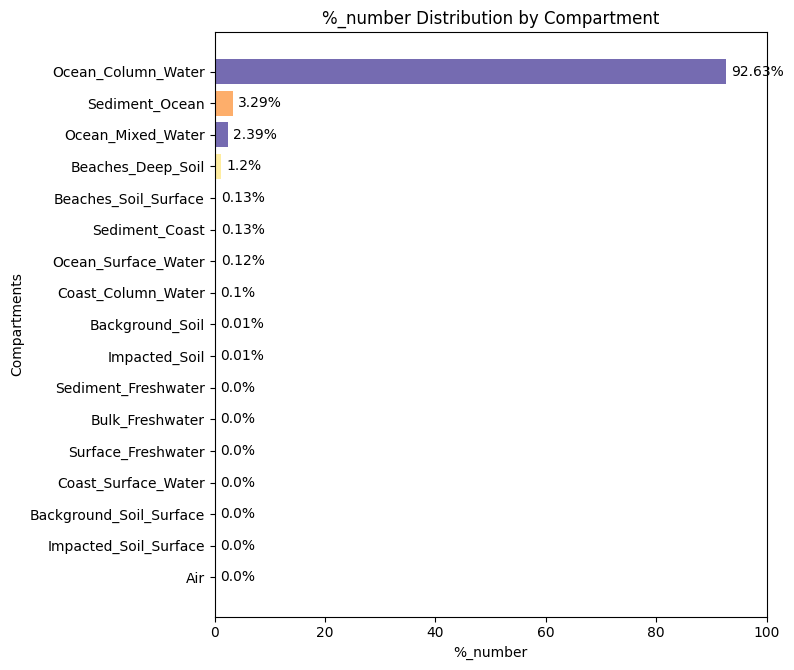

,Compartments,mass_g,number_of_particles,%_mass,%_number,Concentration_g_m3,Concentration_num_m3,inflows_g_s,inflows_num_s,outflows_g_s,outflows_num_s,Total_inflows_g_s,Total_inflows_num_s,Total_outflows_g_s,Total_outflows_num_s
0,Ocean_Surface_Water,2.874960e+07,6.933770e+19,6.471032e-01,1.193868e-01,1.763779e-08,4.253847e+04,"{'k_rising': 4221.867653598561, 'k_mixing': 37...","{'k_rising': 68899.97705833096, 'k_mixing': 1....","{'k_discorporation': 57.39122252753651, 'k_adv...","{'k_discorporation': 869317177.7845792, 'k_adv...",7951.050732,1.927908e+16,8051.050732,1.927974e+16
1,Ocean_Mixed_Water,2.682422e+08,1.386780e+21,6.037664e+00,2.387779e+00,8.228288e-09,4.253925e+04,"{'k_settling': 0.08788413816290262, 'k_mixing'...","{'k_settling': 1003333751118.4424, 'k_mixing':...","{'k_discorporation': 40.61744687355804, 'k_adv...","{'k_discorporation': 1738690085.3950744, 'k_ad...",7994.902618,1.929623e+16,7994.902618,1.929670e+16
2,Ocean_Column_Water,3.911130e+09,5.379757e+22,8.803270e+01,9.262952e+01,2.985595e-09,4.106685e+04,"{'k_settling': 0.08789009476468873, 'k_mixing'...","{'k_settling': 1003360599010.6359, 'k_mixing':...","{'k_discorporation': 0.022042803701122486, 'k_...","{'k_discorporation': 67513972712.04712, 'k_adv...",0.174476,1.461641e+12,0.174476,1.465139e+12
3,Coast_Surface_Water,6.162627e+05,2.840644e+18,1.387100e-02,4.891066e-03,9.184243e-09,4.233449e+04,"{'k_advective_transport': 1.1834997299850378, ...","{'k_advective_transport': 2854386209557.5063, ...","{'k_discorporation': 1.088384281286792, 'k_adv...","{'k_discorporation': 35626981.52599475, 'k_adv...",343.863786,1.580052e+15,343.863786,1.580062e+15
4,Coast_Column_Water,7.067429e+06,5.673202e+19,1.590755e-01,9.768209e-02,5.274201e-09,4.233733e+04,"{'k_advective_transport': 3.6780852127872232, ...","{'k_advective_transport': 19015594682597.234, ...","{'k_discorporation': 0.775779525549386, 'k_adv...","{'k_discorporation': 71152688.4380375, 'k_adve...",345.817334,1.596150e+15,345.817334,1.596157e+15
5,Surface_Freshwater,3.088888e+02,4.217089e+15,6.952547e-06,7.261052e-06,3.413135e-11,4.659767e+02,"{'k_rising': 4.249447606682287e-05, 'k_mixing'...","{'k_rising': 0.0061332011307058815, 'k_mixing'...","{'k_discorporation': 1.5224749458513663e-07, '...","{'k_discorporation': 52920.78437847525, 'k_adv...",2.069589,2.825488e+13,2.069589,2.825488e+13
6,Bulk_Freshwater,3.088808e+03,4.217056e+16,6.952369e-05,7.260995e-05,3.413048e-11,4.659731e+02,"{'k_settling': 2.988072543219288e-05, 'k_mixin...","{'k_settling': 329076882.1105366, 'k_mixing': ...","{'k_discorporation': 1.348959029169335e-07, 'k...","{'k_discorporation': 52920.37220153011, 'k_adv...",2.069614,2.825516e+13,2.069614,2.825516e+13
7,Sediment_Freshwater,7.235109e-03,7.967896e+10,1.628497e-10,1.371925e-10,7.994596e-15,8.804305e-02,{'k_settling': 2.9881021265159976e-05},{'k_settling': 329074315.49738675},"{'k_discorporation': 5.468372491384185e-15, 'k...","{'k_discorporation': 0.010000139840784366, 'k_...",0.000030,3.290743e+08,0.000030,3.290743e+08
8,Sediment_Ocean,1.633221e+08,1.908689e+21,3.676095e+00,3.286411e+00,1.668254e-05,1.949631e+08,{'k_settling': 0.08338347341084025},{'k_settling': 973633162555.2806},"{'k_discorporation': 8.920161053319402e-05, 'k...","{'k_discorporation': 239554634.07829097, 'k_se...",0.083383,9.736332e+11,0.083383,9.736709e+11
9,Sediment_Coast,6.521055e+06,7.463818e+19,1.467776e-01,1.285132e-01,2.433230e-06,2.785007e+07,{'k_settling': 0.007177188424646253},{'k_settling': 82109711969.33104},"{'k_discorporation': 4.027840970376976e-06, 'k...","{'k_discorporation': 9364279.966319444, 'k_sed...",0.007177,8.210971e+10,0.007177,8.211136e+10


In [20]:
processor.extract_results_by_compartment()
for fraction in ["%_mass", "%_number"]:
    processor.plot_compartment_distribution(fraction)
processor.results_by_comp



#### Mass balance by compartment


In [21]:
for i in range(len(processor.results_by_comp)):
    emissions=sum(processor.model.emiss_dict_g_s[processor.results_by_comp['Compartments'].iloc[i]].values())
    print(f"Mass balance for {processor.results_by_comp['Compartments'].iloc[i]}: {processor.results_by_comp['Total_inflows_g_s'].iloc[i]+emissions-processor.results_by_comp['Total_outflows_g_s'].iloc[i]}")

Mass balance for Ocean_Surface_Water: 0.0
Mass balance for Ocean_Mixed_Water: 1.8189894035458565e-12
Mass balance for Ocean_Column_Water: 0.0
Mass balance for Coast_Surface_Water: 0.0
Mass balance for Coast_Column_Water: 0.0
Mass balance for Surface_Freshwater: 8.881784197001252e-16
Mass balance for Bulk_Freshwater: -8.881784197001252e-16
Mass balance for Sediment_Freshwater: 3.3881317890172014e-21
Mass balance for Sediment_Ocean: 1.3877787807814457e-17
Mass balance for Sediment_Coast: -1.734723475976807e-18
Mass balance for Beaches_Soil_Surface: -2.7755575615628914e-17
Mass balance for Beaches_Deep_Soil: 2.7755575615628914e-17
Mass balance for Background_Soil_Surface: -5.421010862427522e-20
Mass balance for Background_Soil: 5.421010862427522e-20
Mass balance for Impacted_Soil_Surface: 5.421010862427522e-20
Mass balance for Impacted_Soil: 0.0
Mass balance for Air: -1.0842021724855044e-19


#### Exposure Indicators

In [22]:
# Calculate exposure indicators
processor.estimate_exposure_indicators()

##### Persistence and Residence Time

In [23]:
processor.processed_results["Overall_exposure_indicators"]

,Overall exposure indicators,Overall persistence (years),Overall residence time (years)
0,Mass,0.116940,0.116806
1,Number,25882.878634,69.584432


In [24]:
processor.processed_results["size_fraction_indicators"]


,Size (um),Pov (years),Tov (years)
0,0.5,25885.444064,65.942407
1,5.0,11856.889386,38.653475
2,50.0,818.887920,9.171677
3,500.0,6.522645,6.354316
4,5000.0,0.061229,0.061220


##### Dispersed mass fraction (φ1) and remotely transferred mass fraction (φ2)

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Environmentally Dispersed Mass Fractions through Air = 6.108889651378877e-10
Environmentally Dispersed Mass Fractions through Ocean_Mixed_Water = 2.202976124296304e-05
Environmentally Dispersed Mass Fractions through Ocean_Surface_Water = 1.418078308193938e-07
φ1 for mass = 2.2172179962747572e-05
Remotely transferred fraction to Ocean_Surface_Water = 1.2666588219469442e-05
Remotely transferred fraction to Ocean_Column_Wa

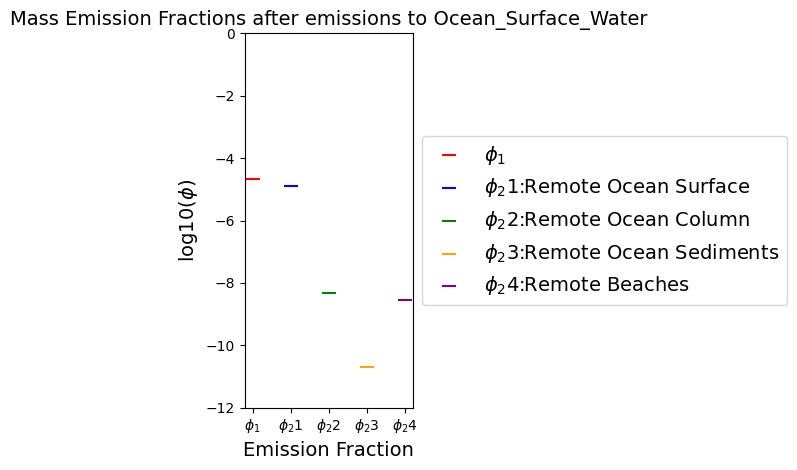

In [25]:
processor.estimate_emission_fractions()

In [26]:
pd.DataFrame(processor.processed_results["emission_fractions_mass_data"])

,Emission Fraction,y
0,φ1,2.217218e-05
1,φ2_1,1.266659e-05
2,φ2_2,4.905032e-09
3,φ2_3,1.973258e-11
4,φ2_4,2.871941e-09


Mass Flow diagram

In [27]:
processor.plot_flows_diagram()

In [28]:
processor.plot_utopia_netFlows()

In [21]:
## Alternativelly to runing step by step one can run all functions at the same time and then acess specific reutls from the processed_results dictionary

#processor.process_all()  # Process all results

In [22]:
#pd.DataFrame(processor.processed_results["emission_fractions_mass_data"])


#### Step 5: Advanced Configuration (Optional)



##### To adjust some input parameters the user can modify the values given in the default conf_data or data_data json files manually by modifying the json file provided in the data folder and saving it under a new name to the load it using then load them using the load_json_file function as provided above or following the comands provided below:


In [47]:
# Define modifications (follow the structure providede in the default configuration data (data_data))
modifications = {
    "MPdensity_kg_m3": 980,
    "MP_composition": "PE",
    'FI': 0.5
}

# Modify and save the data
model.modify_and_save_data(data_data, modifications, "custom_data.json")

Modified data saved to C:\Users\PradoDomercq\Documents\Python Scripts\UTOPIA_package\utopia\src\utopia\data\custom_data.json


In [49]:
# Load the modified data to check if the changes were applied correctly
user_data = utopiaModel.load_json_file("data/custom_data.json")
Newmodel = utopiaModel(config=config_data, data=user_data)
Newmodel.summarize()

Model: UTOPIA
Microplastic Density (kg/m3): 980
MP shape:  sphere
Emissions made to MP form:  freeMP
Fragmentation style: Mixed (F = 0.5)
Fragmetation timescale (days):  36.5
Discorporation timescale (days):  4584
Emissions to Air for size fraction 5000.0 µm: 100 g/s


Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


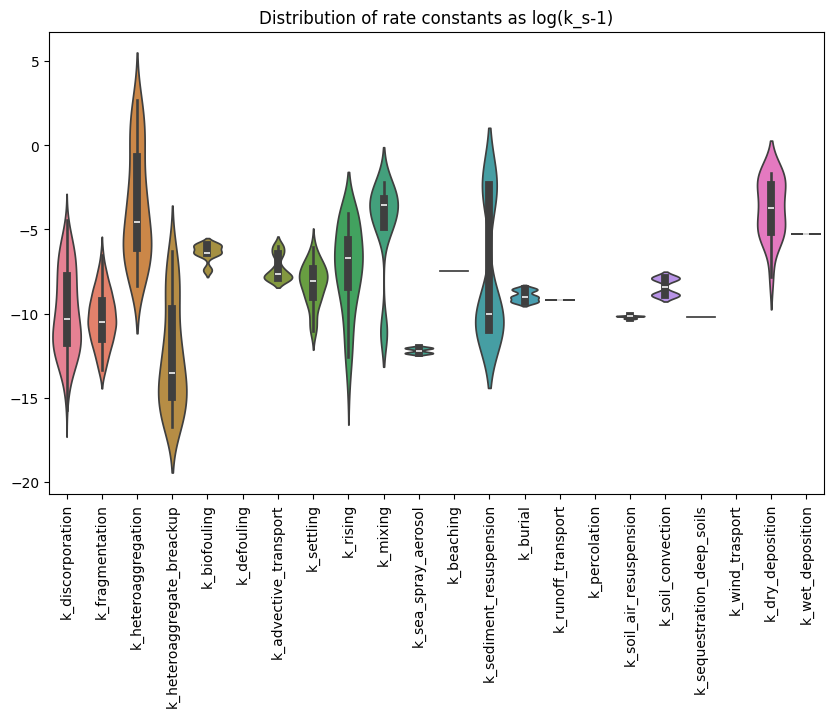

c:\Users\PradoDomercq\AppData\Local\miniconda3\envs\utopia_env\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

divide by zero encountered in log10



<Figure size 640x480 with 0 Axes>

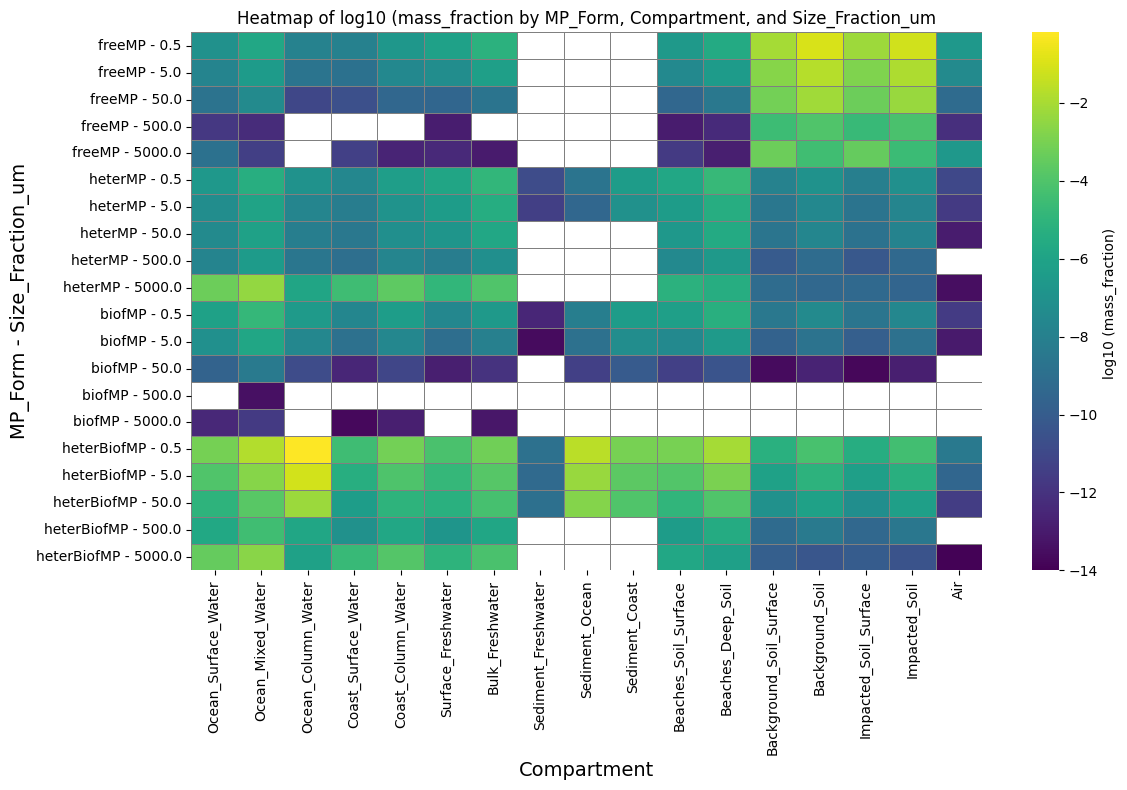

c:\Users\PradoDomercq\AppData\Local\miniconda3\envs\utopia_env\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

divide by zero encountered in log10



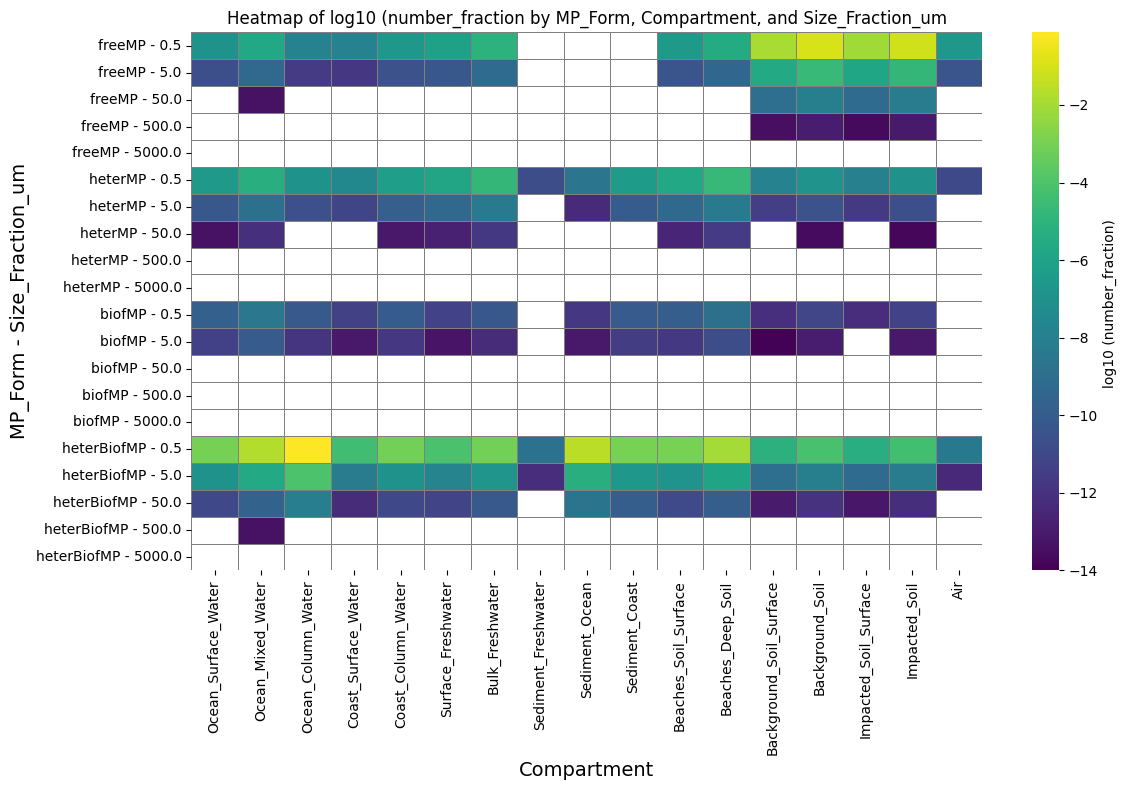

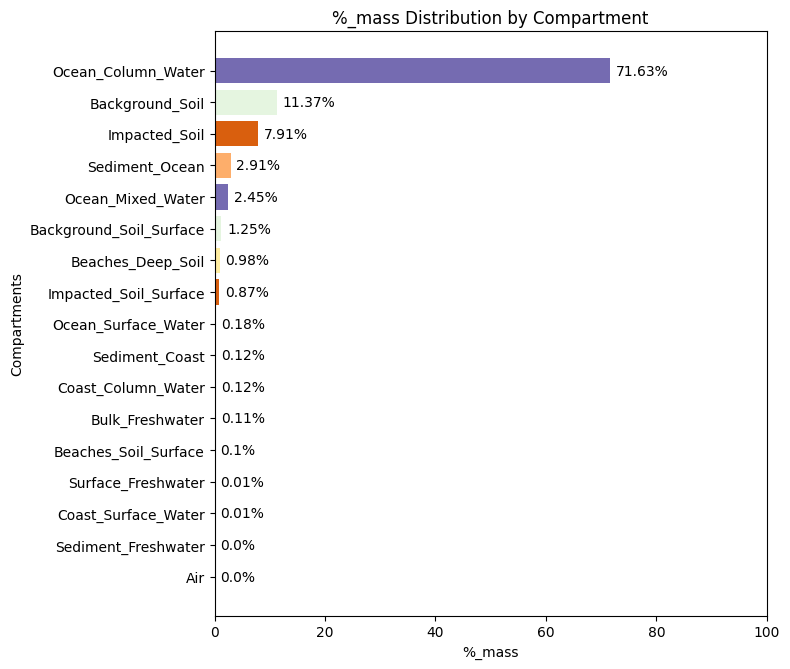

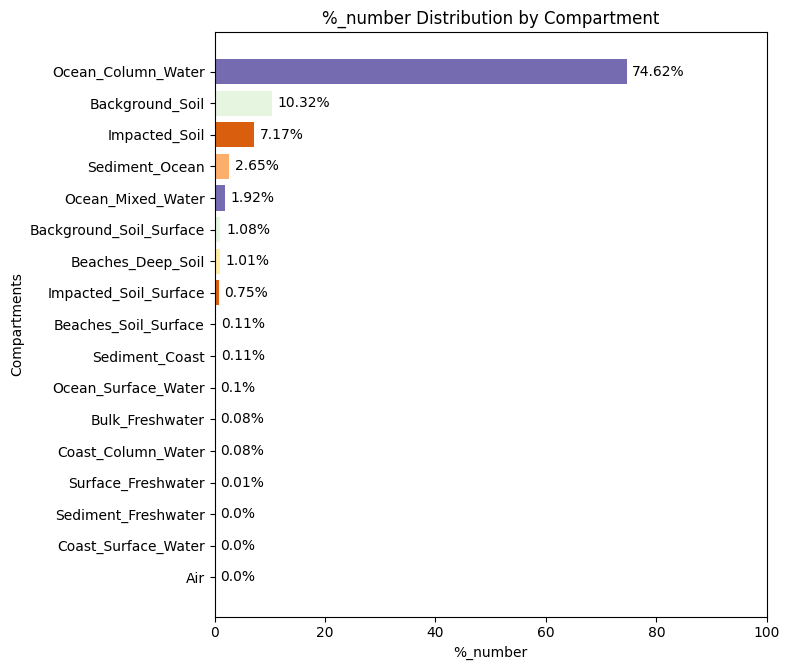

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Environmentally Dispersed Mass Fractions through Air = 2.7375082683468395e-07
Environmentally Dispersed Mass Fractions through Ocean_Mixed_Water = 3.749974041197655e-05
Environmentally Dispersed Mass Fractions through Ocean_Surface_Water = 1.6264400771184335e-07
φ1 for mass = 3.793613524652308e-05
Remotely transferred fraction to Ocean_Surface_Water = 2.162016077918695e-05
Remotely transferred fraction to Ocean_Column_Wa

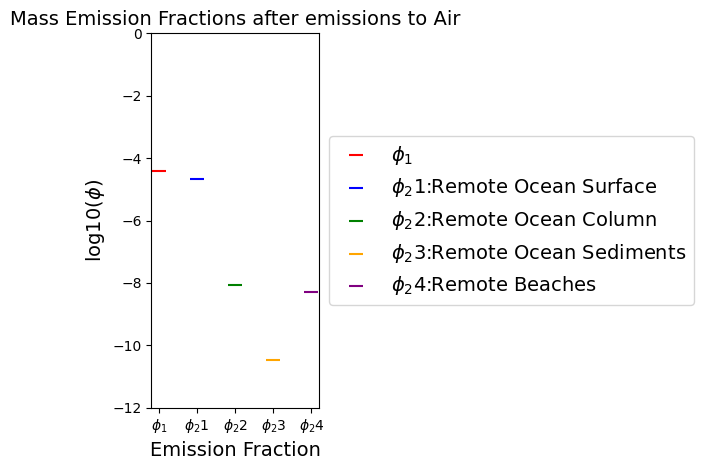

In [50]:
Newmodel.run()  # Run the model to estimate steady state solution for the system.
# Process results   
# Process results
processorNew = ResultsProcessor(Newmodel)  # Pass model with results
processorNew.process_all()  # Process all results


In [52]:
pd.DataFrame(processorNew.processed_results["emission_fractions_mass_data"])

,Emission Fraction,y
0,φ1,3.793614e-05
1,φ2_1,2.162016e-05
2,φ2_2,8.421116e-09
3,φ2_3,3.412974e-11
4,φ2_4,4.964756e-09


In [51]:
processorNew.plot_utopia_netFlows()


# Step 7: Saving the Model Output (Optional)

# If you want users to save the results, add a section for that.
# Example:
# output_file = "model_output.json"
# with open(output_file, "w") as file:
#     json.dump(results, file)
# print(f"Results saved to {output_file}")


# For example, assuming the model returns results as a dictionary or DataFrame:
# results = model.get_results()  # Replace with the actual result retrieval method

# Let's print the results (this part depends on how your model outputs results).
# print("Model Results:", results)

# Step 5: Visualize the Results (Optional)

# If your model has data for visualization, we can plot the results using libraries like matplotlib.
# Example:
# import matplotlib.pyplot as plt

# plt.plot(results['some_data_column'])  # Replace with actual results data
# plt.title("Model Results Over Time")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.show()

# Step 6: Advanced Configuration (Optional)

# Allow users to adjust some configuration parameters if needed. This could be useful if you want to modify some settings during runtime.
# For example:
# user_config = {"MPdensity_kg_m3": 1200, "boxName": "New_Box"}  # Modify based on user input
# model.update_config(user_config)  # Assuming a method for updating configuration

# Step 7: Saving the Model Output (Optional)

# If you want users to save the results, add a section for that.
# Example:
# output_file = "model_output.json"
# with open(output_file, "w") as file:
#     json.dump(results, file)
# print(f"Results saved to {output_file}")
